<a href="https://colab.research.google.com/github/danaeaverk/EKPA2/blob/main/ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εισαγωγή βιβλιοθηκών

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

In [2]:
#εισαγωγή συνόλου δεδομένων

url = "https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()


(14967, 26)


,Avg_syn_flag,Avg_urg_flag,Avg_fin_flag,Avg_ack_flag,Avg_psh_flag,Avg_rst_flag,Avg_DNS_pkt,Avg_TCP_pkt,Avg_UDP_pkt,Avg_ICMP_pkt,...,Min_pkts_lenght,Max_pkts_lenght,StDev_pkts_lenght,Avg_small_payload_pkt,Avg_payload,Min_payload,Max_payload,StDev_payload,Avg_DNS_over_TCP,target
0,-0.230455,4.523595,-1.276876,0.814947,-0.016410,-2.995087,1.063889,-2.371085,-2.840079,-0.283463,...,3.665958,-5.104394,0.690436,-1.584535,-2.282169,-6.064334,-0.756736,-1.488713,0.694093,2.0
1,-2.088776,2.387204,0.338205,1.419440,0.114833,0.913599,0.847367,-0.008734,-1.058475,0.342997,...,9.115390,-1.441248,1.710273,-0.274751,0.349761,8.602419,0.337548,0.362154,1.193261,0.0
2,-0.043220,3.578791,-1.073984,0.313930,-1.774397,-1.006298,0.929811,-3.432328,-1.932374,0.318437,...,-0.061857,-1.210975,0.435881,1.494576,0.074463,-5.532110,-0.088565,0.702886,0.104589,2.0
3,0.065305,3.761012,1.174174,0.761965,0.857883,-0.597540,-0.022305,1.695764,3.305753,0.792997,...,0.742680,-1.267473,-0.327164,0.188910,-0.122022,2.977927,-0.472563,1.779231,-0.058810,1.0
4,3.875263,1.385111,-2.633112,-0.545981,-1.570862,-3.460744,-1.882090,-2.115882,-2.954608,0.986303,...,2.235826,-0.848212,-0.320711,-1.145686,1.356040,-5.251642,0.787477,1.194117,3.840521,1.0


In [32]:
#διαχωρισμός χαρακτηριστικών και μεταβλητής στόχου

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
#συνάρτηση δημιουργίας νευρωνικού δικτύου
def create_model(input_dim, num_classes):
    model = Sequential()

    model.add(Dense(256, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_dim = X_train.shape[1]
num_classes = len(df['target'].unique())

model = create_model(input_dim, num_classes)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,003 (187.51 KB)

 Trainable params: 48,003 (187.51 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#εκπαίδευση

early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_ids_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early, checkpoint],
    verbose=1
)


Epoch 1/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5478 - loss: 0.9495

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5568 - loss: 0.9373 - val_accuracy: 0.8568 - val_loss: 0.4566
Epoch 2/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8210 - loss: 0.5434

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8218 - loss: 0.5419 - val_accuracy: 0.8902 - val_loss: 0.3902
Epoch 3/50
35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8555 - loss: 0.4727

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8560 - loss: 0.4727 - val_accuracy: 0.9027 - val_loss: 0.3664
Epoch 4/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8703 - loss: 0.4618

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8705 - loss: 0.4608 - val_accuracy: 0.9094 - val_loss: 0.3490
Epoch 5/50
35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8843 - loss: 0.4346

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8845 - loss: 0.4337 - val_accuracy: 0.9098 - val_loss: 0.3426
Epoch 6/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8874 - loss: 0.4130

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8874 - loss: 0.4135 - val_accuracy: 0.9140 - val_loss: 0.3361
Epoch 7/50
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8973 - loss: 0.3952 

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8972 - loss: 0.3957 - val_accuracy: 0.9148 - val_loss: 0.3354
Epoch 8/50
35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9017 - loss: 0.3767

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9014 - loss: 0.3788 - val_accuracy: 0.9177 - val_loss: 0.3299
Epoch 9/50
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8978 - loss: 0.3892

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8980 - loss: 0.3900 - val_accuracy: 0.9190 - val_loss: 0.3234
Epoch 10/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9050 - loss: 0.3813

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9048 - loss: 0.3813 - val_accuracy: 0.9215 - val_loss: 0.3205
Epoch 11/50
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.3769

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9066 - loss: 0.3761 - val_accuracy: 0.9236 - val_loss: 0.3169
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9123 - loss: 0.3536 - val_accuracy: 0.9232 - val_loss: 0.3156
Epoch 13/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9082 - loss: 0.3589

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9081 - loss: 0.3592 - val_accuracy: 0.9240 - val_loss: 0.3138
Epoch 14/50
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9108 - loss: 0.3598

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9107 - loss: 0.3606 - val_accuracy: 0.9244 - val_loss: 0.3108
Epoch 15/50
30/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9159 - loss: 0.3357

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9149 - loss: 0.3400 - val_accuracy: 0.9253 - val_loss: 0.3128
Epoch 16/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9072 - loss: 0.3641 - val_accuracy: 0.9253 - val_loss: 0.3094
Epoch 17/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9159 - loss: 0.3331

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9156 - loss: 0.3340 - val_accuracy: 0.9257 - val_loss: 0.3109
Epoch 18/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9104 - loss: 0.3590 - val_accuracy: 0.9257 - val_loss: 0.3086
Epoch 19/50
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9092 - loss: 0.3603

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9100 - loss: 0.3582 - val_accuracy: 0.9261 - val_loss: 0.3074
Epoch 20/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9141 - loss: 0.3412 - val_accuracy: 0.9257 - val_loss: 0.3101
Epoch 21/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9179 - loss: 0.3234 - val_accuracy: 0.9253 - val_loss: 0.3093
Epoch 22/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9203 - loss: 0.3134 - val_accuracy: 0.9261 - val_loss: 0.3054
Epoch 23/50
35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9152 - loss: 0.3285

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9156 - loss: 0.3280 - val_accuracy: 0.9269 - val_loss: 0.3028
Epoch 24/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9260 - loss: 0.3012 - val_accuracy: 0.9265 - val_loss: 0.3032
Epoch 25/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9247 - loss: 0.2951 - val_accuracy: 0.9261 - val_loss: 0.3066
Epoch 26/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9192 - loss: 0.3146 - val_accuracy: 0.9261 - val_loss: 0.3033
Epoch 27/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9202 - loss: 0.3091 - val_accuracy: 0.9269 - val_loss: 0.3049
Epoch 28/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9240 - loss: 0.3006 - val_accuracy: 0.9257 - val_loss: 0.3045


In [35]:
#αξιολόγηση μοντέλου

loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.3374
Test accuracy: 0.9188376665115356
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      1001
         1.0       0.92      0.92      0.92      1003
         2.0       0.91      0.94      0.93       990

    accuracy                           0.92      2994
   macro avg       0.92      0.92      0.92      2994
weighted avg       0.92      0.92      0.92      2994



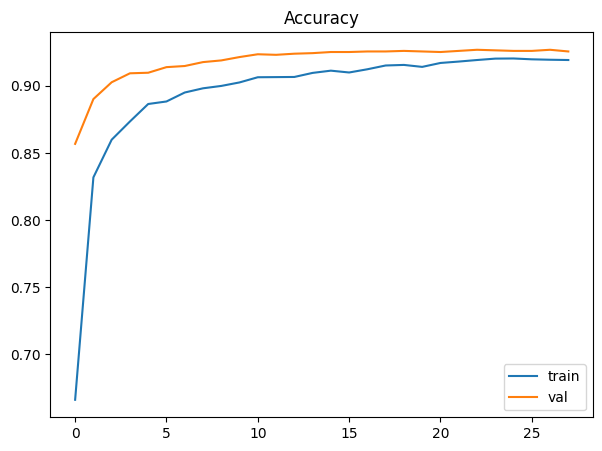

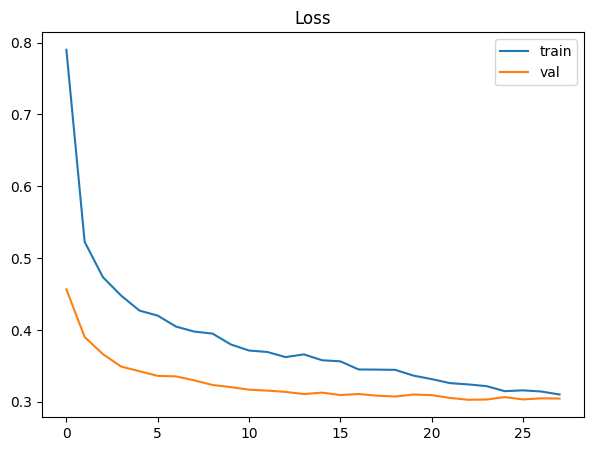

In [36]:
 #εκτύπωση γραφικής απεικόνισης ακρίβειας μοντέλου

plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["train", "val"])

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["train", "val"])
